<a href="https://colab.research.google.com/github/thedarkscepter/vigilant-spork/blob/main/122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import cv2


In [ ]:
X,y = fetch_openml('mnist_784', version = 1, return_X_y=True)
print(pd.Series(y).value_counts())
classes = ['0','1','2','3','4','5','6','7','8','9']
nclasses = len(classes)

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64


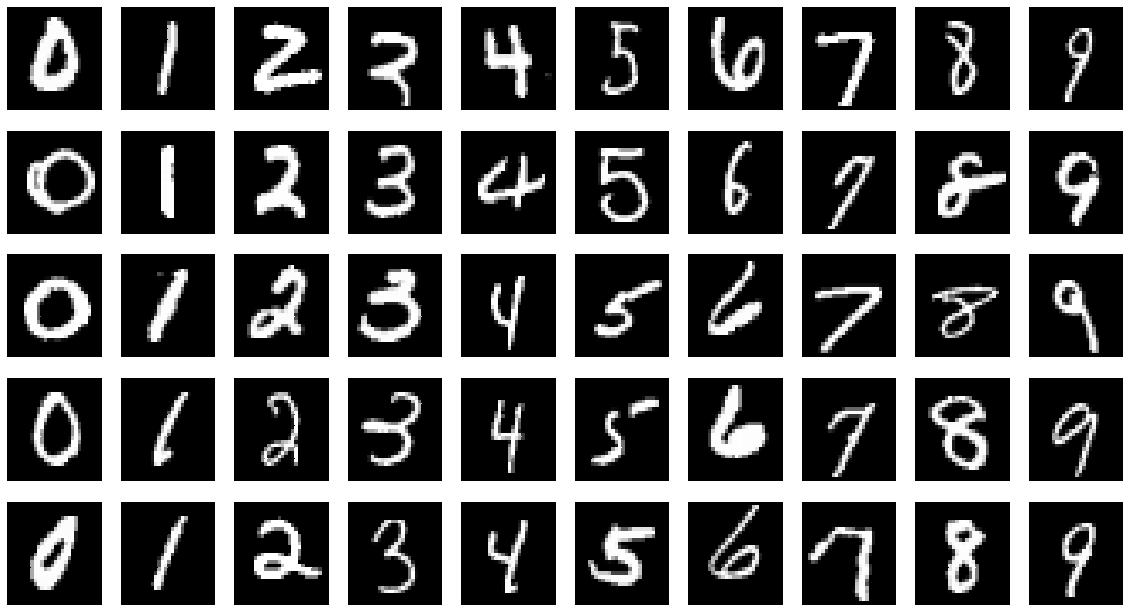

In [12]:
samples_per_class = 5
figure = plt.figure(figsize = (nclasses*2,(1+samples_per_class*2)))
idx_cls = 0
for cls in classes:
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs,samples_per_class,replace=False)
  i = 0
  for idx in idxs:
    plt_idx = i*nclasses+idx_cls+1
    p = plt.subplot(samples_per_class, nclasses, plt_idx);
    p = sns.heatmap(np.reshape(X[idx],(28,28)),cmap=plt.cm.gray, xticklabels = False,cbar = False);
    p = plt.axis('OFF');
    i+= 1
  idx_cls+=1

In [13]:
print(len(X))
print(len(X[0]))

70000
784


In [15]:
print(X[0])
print(y[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 9,train_size = 7500,test_size = 2500)
X_train_scalet = X_train/255.0
X_test_scalet = X_test/255.0

In [17]:
cls = LogisticRegression(solver='saga', multi_class='multinomial').fit(X_train_scalet, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [19]:
y_pred = cls.predict(X_test_scalet)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9004


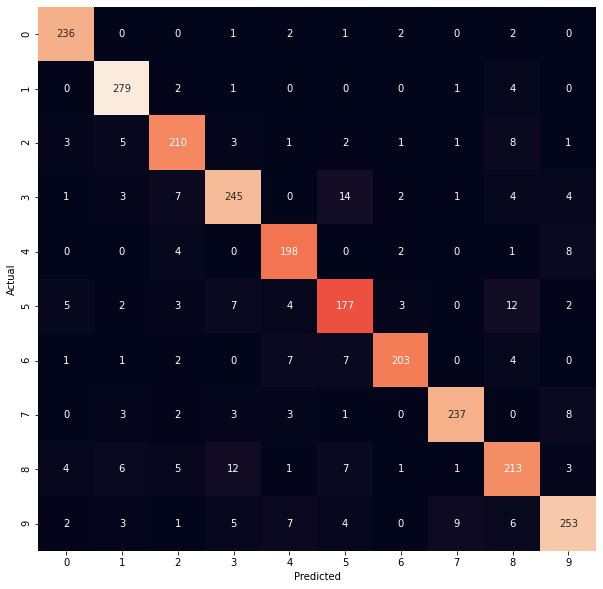

In [23]:
cm = pd.crosstab(y_test,y_pred,rownames=['Actual'], colnames=['Predicted'])
p = plt.figure(figsize = (10,10))
p = sns.heatmap(cm,annot = True, fmt = 'd', cbar = False)